In [1]:
from sklearn.preprocessing import MinMaxScaler
import numpy as np
import pandas as pd
import tensorflow as tf
import MIDASpy as md
import math


In [2]:
column_names=['column 1','column 2','column 3','column 4','column 5','column 6','column 7','column 8','column 9','column 10','column 11','column 12',]
df=pd.read_excel(r'C:\Users\furqz\OneDrive\Desktop\Data mining stiff\incomplete\Incomplete Datasets Without Labels\Difdoug\Difdoug_NE_5.xlsx', header=None,names=column_names)
df

,column 1,column 2,column 3,column 4,column 5,column 6,column 7,column 8,column 9,column 10,column 11,column 12
0,0.113880,0.042485,1.97890,1.83630,2.88660,2.46960,0.21541,3.09000,0.78343,0.51035,0.03043,NaN
1,0.029389,0.206580,0.48861,1.43430,3.12990,1.27780,1.42850,0.14333,1.19480,2.13180,0.98473,3.844500
2,-1.115400,0.217560,1.61050,1.33710,3.76820,1.21000,3.99630,2.21730,3.90290,1.51440,2.43890,0.633580
3,-0.539160,-0.061874,0.36486,0.33278,0.19027,0.56716,1.66010,2.35270,0.66126,3.13510,3.93810,3.734600
4,-0.268400,-1.006000,2.88220,1.56160,3.20140,3.37740,1.52260,0.98475,3.10940,3.65640,3.91720,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...
395,-1.867100,NaN,3.72580,3.70480,0.88269,0.35406,1.62780,3.29400,1.08500,0.15740,0.46504,2.851400
396,0.264630,-6.107600,3.90540,1.33770,1.41870,1.68610,1.09510,3.79360,0.12790,0.54249,3.36580,3.755600
397,-3.479100,-1.993300,1.32480,1.77210,2.55090,1.47010,0.92540,1.84110,3.47730,0.95496,1.52630,2.123800
398,7.293000,-0.411470,2.49480,0.39655,2.99900,3.41010,2.95160,0.27800,0.99059,3.43740,1.81620,0.087212


In [3]:
print('dataType',end='\t')
print('column_names',end='\t')
print('Number of Nulls')
for name in column_names:
    print(df[name].dtype,end='\t\t')
    print(name,end='\t')
    print(df[name].isnull().sum())

dataType	column_names	Number of Nulls
float64		column 1	24
float64		column 2	18
float64		column 3	18
float64		column 4	24
float64		column 5	18
float64		column 6	18
float64		column 7	24
float64		column 8	13
float64		column 9	25
float64		column 10	6
float64		column 11	6
float64		column 12	25


In [4]:
df.describe()

,column 1,column 2,column 3,column 4,column 5,column 6,column 7,column 8,column 9,column 10,column 11,column 12
count,376.000000,382.000000,382.000000,376.000000,382.000000,382.000000,376.000000,387.000000,375.000000,394.000000,394.000000,375.000000
mean,-0.081686,0.096957,2.037599,1.882851,1.953594,1.964107,2.027090,1.974669,1.951040,2.019890,1.967007,1.931280
std,2.459382,2.692676,1.134567,1.138276,1.166219,1.134676,1.156054,1.132638,1.150891,1.159524,1.152316,1.176806
min,-7.771000,-6.828400,0.005583,0.005376,0.000530,0.018503,0.003618,0.007321,0.007019,0.055837,0.006786,0.001972
25%,-0.648875,-0.742862,1.120125,0.936392,0.882807,1.041225,1.030075,1.032200,0.960680,1.027250,0.913220,0.905260
50%,-0.074609,0.030257,2.091100,1.763800,1.940900,1.992100,2.094400,1.951100,2.042100,2.073750,1.913900,1.886400
75%,0.727078,0.884558,2.980825,2.795200,2.997250,2.946950,2.972550,2.953600,2.904050,3.040750,2.966425,2.953800
max,8.409300,6.777100,3.976400,3.993400,3.979000,3.992300,3.996300,3.995000,3.985500,3.984300,3.967600,3.996000


<AxesSubplot:>

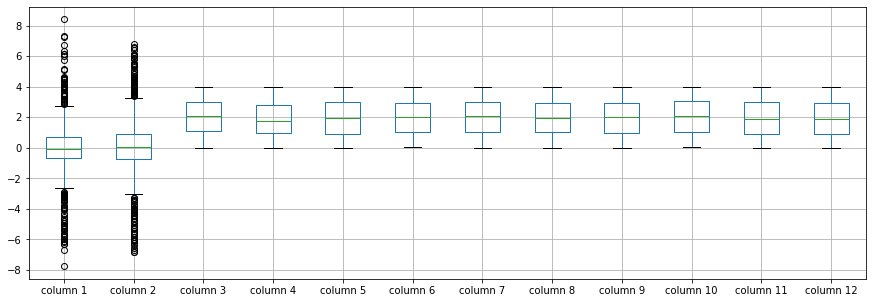

In [5]:
df.boxplot(return_type='axes', figsize=(15,5))

In [6]:
df.mean()

column 1    -0.081686
column 2     0.096957
column 3     2.037599
column 4     1.882851
column 5     1.953594
column 6     1.964107
column 7     2.027090
column 8     1.974669
column 9     1.951040
column 10    2.019890
column 11    1.967007
column 12    1.931280
dtype: float64

In [7]:
corr=df.corr()
corr

,column 1,column 2,column 3,column 4,column 5,column 6,column 7,column 8,column 9,column 10,column 11,column 12
column 1,1.000000,0.021611,0.002664,-0.097972,0.022256,-0.021322,-0.037870,0.030174,-0.030771,0.053882,0.071350,-0.034623
column 2,0.021611,1.000000,-0.055318,0.065051,-0.058263,-0.095034,0.034383,-0.014073,-0.034941,0.019804,-0.047536,0.057457
column 3,0.002664,-0.055318,1.000000,-0.029975,-0.019058,-0.056537,-0.090841,0.089397,0.152739,-0.029050,-0.087365,0.004956
column 4,-0.097972,0.065051,-0.029975,1.000000,-0.033144,0.119075,0.004746,0.088490,-0.029104,0.069460,-0.015983,-0.043812
column 5,0.022256,-0.058263,-0.019058,-0.033144,1.000000,0.090820,0.004738,0.014037,0.013033,0.005803,0.002486,-0.021229
column 6,-0.021322,-0.095034,-0.056537,0.119075,0.090820,1.000000,0.002536,0.060820,0.005973,0.026148,0.032048,-0.046369
column 7,-0.037870,0.034383,-0.090841,0.004746,0.004738,0.002536,1.000000,-0.045472,0.063568,0.011389,0.013546,-0.063579
column 8,0.030174,-0.014073,0.089397,0.088490,0.014037,0.060820,-0.045472,1.000000,0.067303,-0.147857,-0.038661,-0.022080
column 9,-0.030771,-0.034941,0.152739,-0.029104,0.013033,0.005973,0.063568,0.067303,1.000000,0.003636,0.020934,0.087501
column 10,0.053882,0.019804,-0.029050,0.069460,0.005803,0.026148,0.011389,-0.147857,0.003636,1.000000,-0.001455,0.021978


In [8]:
tf.compat.v1.reset_default_graph()
import tensorflow.compat.v1 as tf
tf.reset_default_graph()


In [9]:
imputer = md.Midas(layer_structure = [12,12+19,12+19+19,12+19+19+19,12+19+19+19+19,12+19+19+19+19+19,12+19+19+19+19+19+19,12+19+19+19+19+19+19+19,12+19+19+19+19+19+19,12+19+19+19+19+19,12+19+19+19+19,12+19+19+19,12+19+19,12+19,12], vae_layer = False, seed = 19)
imputer.build_model(df)
imputer.train_model(training_epochs=100)


Size index: [12]

Computation graph constructed

Model initialised

Epoch: 0 , loss: 26.35557159423828
Epoch: 1 , loss: 26.33379051208496
Epoch: 2 , loss: 26.336567840576173
Epoch: 3 , loss: 26.226093063354494
Epoch: 4 , loss: 26.143867874145506
Epoch: 5 , loss: 25.937797622680662
Epoch: 6 , loss: 25.523743667602538
Epoch: 7 , loss: 23.865615844726562
Epoch: 8 , loss: 21.904275817871095
Epoch: 9 , loss: 21.29643165588379
Epoch: 10 , loss: 20.83675010681152
Epoch: 11 , loss: 20.767644348144533
Epoch: 12 , loss: 20.434555587768553
Epoch: 13 , loss: 20.000868835449218
Epoch: 14 , loss: 19.845967559814454
Epoch: 15 , loss: 19.769190673828124
Epoch: 16 , loss: 19.695339279174803
Epoch: 17 , loss: 19.910807647705077
Epoch: 18 , loss: 19.543688659667968
Epoch: 19 , loss: 19.126590728759766
Epoch: 20 , loss: 19.248608703613282
Epoch: 21 , loss: 19.037027893066405
Epoch: 22 , loss: 19.197967376708984
Epoch: 23 , loss: 19.17358673095703
Epoch: 24 , loss: 18.90847511291504
Epoch: 25 , loss: 18.76

In [10]:
imputations=imputer.generate_samples(m=15).output_list
np.shape(imputations[-1])

INFO:tensorflow:Restoring parameters from tmp/MIDAS
Model restored.


(400, 12)

In [11]:
new_df=imputations[-1]
new_df.iloc[21,:]


column 1    -0.705950
column 2     0.128930
column 3     1.058100
column 4     2.136200
column 5     0.687665
column 6     2.245800
column 7     3.727700
column 8     2.227200
column 9     1.943500
column 10    1.987000
column 11    2.470700
column 12    0.368260
Name: 21, dtype: float64

In [12]:
complete_df=pd.read_excel(r'C:\Users\furqz\OneDrive\Desktop\Data mining stiff\complete\Original Datasets Without Labels\Difdoug.xlsx', header=None,names=column_names)

In [13]:
new_df-complete_df

,column 1,column 2,column 3,column 4,column 5,column 6,column 7,column 8,column 9,column 10,column 11,column 12
0,0.0,0.00000,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.577519
1,0.0,0.00000,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.000000
2,0.0,0.00000,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.000000
3,0.0,0.00000,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.000000
4,0.0,0.00000,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,-0.146260
...,...,...,...,...,...,...,...,...,...,...,...,...
395,0.0,4.81527,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.000000
396,0.0,0.00000,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.000000
397,0.0,0.00000,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.000000
398,0.0,0.00000,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.000000


Calculating NRMSE Value

In [14]:

def Sum_new(sum):
    summ=0
    for n in sum:
        summ=summ+n
    return (summ)



In [15]:
def Frobenius_norm(number):
    num=number
    abs_val=num.abs()
    power_abs=abs_val**2
    sum1=power_abs.sum()
    total_sum=Sum_new(sum1)
    return(math.sqrt(total_sum))

In [16]:
numerator=Frobenius_norm(new_df-complete_df)
denominator=Frobenius_norm(complete_df)
numerator, denominator

(34.276732736389725, 163.27447192538312)

In [17]:
NRMS=numerator/denominator
NRMS


0.20993320224642517

In [18]:
new_df.iloc[66,:]

column 1    -0.047752
column 2     0.267760
column 3     0.403430
column 4     1.187200
column 5     3.956600
column 6     2.583000
column 7     2.830600
column 8     3.074200
column 9     1.538100
column 10    0.246200
column 11    0.853340
column 12    3.604400
Name: 66, dtype: float64

In [19]:
imputations[-1]


,column 1,column 2,column 3,column 4,column 5,column 6,column 7,column 8,column 9,column 10,column 11,column 12
0,0.113880,0.042485,1.97890,1.83630,2.88660,2.46960,0.215410,3.09000,0.78343,0.51035,0.03043,0.678179
1,0.029389,0.206580,0.48861,1.43430,3.12990,1.27780,1.428500,0.14333,1.19480,2.13180,0.98473,3.844500
2,-1.115400,0.217560,1.61050,1.33710,3.76820,1.21000,3.996300,2.21730,3.90290,1.51440,2.43890,0.633580
3,-0.539160,-0.061874,0.36486,0.33278,0.19027,0.56716,1.660100,2.35270,0.66126,3.13510,3.93810,3.734600
4,-0.268400,-1.006000,2.88220,1.56160,3.20140,3.37740,1.522600,0.98475,3.10940,3.65640,3.91720,0.800800
...,...,...,...,...,...,...,...,...,...,...,...,...
395,-1.867100,0.086070,3.72580,3.70480,0.88269,0.35406,1.627800,3.29400,1.08500,0.15740,0.46504,2.851400
396,0.264630,-6.107600,3.90540,1.33770,1.41870,1.68610,1.095100,3.79360,0.12790,0.54249,3.36580,3.755600
397,-3.479100,-1.993300,1.32480,1.77210,2.55090,1.47010,0.925400,1.84110,3.47730,0.95496,1.52630,2.123800
398,7.293000,-0.411470,2.49480,0.39655,2.99900,3.41010,2.951600,0.27800,0.99059,3.43740,1.81620,0.087212


In [20]:
imputations[-1].to_excel("Difdoug_NE_5(imp).xlsx", index=False, header=False)